In [247]:
# In this notebook, 
# I want to check if there are any particular features that contribute to a particular kind of crash

In [248]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [249]:
data = pd.read_csv('./dataset/cleaned_merged_dataset.csv')

In [250]:
data.head(2)

,FlightNumber,Time,Day,Month,Year,Decade,AirplaneDamage,AirplaneFate,Phase,Crash_Elev_m,...,Psngr_Occ,GndFatal,Coll_Fatal,Country,Continents,Hemisphere,Seasons,orig_latitude,orig_longitude,label
0,12,16:11,Thursday,FEB,2017,2010,Minor,Repaired,Taxi (TXI),0,...,4,0,0,Canada,North America,Northern,Winter,64.909102,-125.567917,human
1,13,06:53,Friday,MAY,2017,2010,Damaged beyond repair,-,Landing (LDG),0,...,0,0,0,United States,North America,Northern,Spring,38.370485,-81.596705,human


In [251]:
data.ix[data['Continents'] == 'North America', 'Continents'] = 'NorthAmerica'
data.ix[data['Continents'] == 'South America', 'Continents'] = 'SouthAmerica'

In [252]:
data.columns

Index(['FlightNumber', 'Time', 'Day', 'Month', 'Year', 'Decade',
       'AirplaneDamage', 'AirplaneFate', 'Phase', 'Crash_Elev_m', 'Age',
       'Operator', 'Nature_Code', 'Type_Code', 'Engine_Type', 'Engine_count',
       'Crew_Fatal', 'Crew_Occ', 'Total_Fatal', 'Total_Occ', 'Psngr_Fatal',
       'Psngr_Occ', 'GndFatal', 'Coll_Fatal', 'Country', 'Continents',
       'Hemisphere', 'Seasons', 'orig_latitude', 'orig_longitude', 'label'],
      dtype='object')

The target here is going to be the label. There are different categories of the label. So this is a classification problem.

Test the hypothesis with a logistic regression using statsmodels.

In [253]:
# Considering potential features that could contribute to a classification:
predictors = ['Crew_Occ', 'Psngr_Occ', 'Continents', 'Seasons', 'Age', 'Decade', 'orig_latitude', 'orig_longitude']
target = ['label']

In [254]:
X = data.loc[:,predictors]

In [255]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y = le.fit_transform(data['label'])

In [256]:
# Convert X data to dummies
X_dummies = pd.get_dummies(X, drop_first=True)

In [257]:
X_dummies.columns

Index(['Crew_Occ', 'Psngr_Occ', 'Age', 'Decade', 'orig_latitude',
       'orig_longitude', 'Continents_Antarctica', 'Continents_Asia',
       'Continents_Australia', 'Continents_Europe', 'Continents_NorthAmerica',
       'Continents_SouthAmerica', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter'],
      dtype='object')

In [258]:
X_dummies.shape

(8098, 15)

In [259]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()

scores = cross_val_score(lr, X_dummies, y, cv=5)
print (scores)
print (np.mean(scores))

[ 0.37176326  0.36004932  0.38703704  0.39579468  0.3729128 ]
0.377511419419


- The model is really bad to identify a classification using a cross validation testing.
- Let me try using a train test split, to see if it makes any difference.

In [260]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.7)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [261]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.382873610539
0.377491621097


In [262]:
# predictions and pred prob.
yhat = lr.predict(X_test)
yhat_pp = lr.predict_proba(X_test)

In [263]:
len(yhat_pp)

5669

In [264]:
# The logistic regression model does not seem to show results that relate the features to the target class

### Try a better classifier model - KNN Classification model

In [280]:
from sklearn.neighbors import KNeighborsClassifier
# compute classification accuracy
from sklearn import metrics

In [323]:
# make an instance of a KNeighborsClassifier object with 1 neighbor
knn = KNeighborsClassifier(weights = 'uniform', n_neighbors=3)

In [324]:
X_dummies.shape, y.shape

((8098, 15), (8098,))

In [325]:
# fit on the unstandardized data:
knn.fit(X_dummies, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [326]:
# predict the response values for the observations in X ("test the model")
# store the predicted response values
y_pred_class = knn.predict(X_dummies)
print(metrics.accuracy_score(y, y_pred_class))

0.639787601877


In [327]:
# Refit after creating a train test split

In [332]:
from sklearn.model_selection import train_test_split

# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=None, test_size=0.4)

# STEP 2: train the model on the training set (using K=1)
knn = KNeighborsClassifier(weights = 'distance', algorithm = 'brute', n_neighbors=4)
knn.fit(X_train, y_train)

# STEP 3: test the model on the testing set, and check the accuracy
y_pred_class = knn.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred_class))

0.39012345679


In [ ]:
# Check the accuracy metrics when KNN is fit with neighbors from 1 to number of rows

In [345]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs = ss.fit_transform(X_dummies)

In [341]:
# plot test accuracy by number of neighbors:
test_acc_std = []
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    test_acc_std.append(np.mean(cross_val_score(knn, Xs, y, cv=5)))

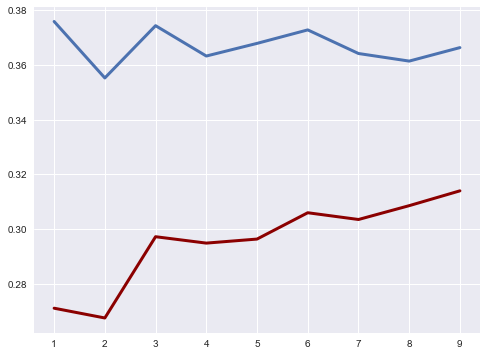

In [344]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, 10), test_acc, lw=3.)
ax.plot(range(1, 10), test_acc_std, lw=3., color='darkred')
plt.show()

### Try the OneVsRestClassifier
- SVM(Support Vector Machine) is generally a good approach to check if the basic logistic regression(LR) does not perform well. SVMs use a different loss function (Hinge) from LR. They are also interpreted differently (maximum-margin). However, in practice, an SVM with a linear kernel is not very different from a Logistic Regression.
- The main reason you would want to use an SVM instead of a Logistic Regression is because your problem might not be linearly separable. In that case, you will have to use an SVM with a non linear kernel (e.g. RBF). The truth is that a Logistic Regression can also be used with a different kernel, but at that point you might be better off going for SVMs for practical reasons. Another related reason to use SVMs is if you are in a highly dimensional space. For example, SVMs have been reported to work better for text classification. 
- reference : https://www.quora.com/What-are-the-advantages-of-different-classification-algorithms
- Check each class performance against the others

- The classes perform pretty bad on a logistic regression model.
- I would liek to check the model ROC curve.
- This is a multi class problem, so drawing the ROC is not straightforward for it.
    - A method called One vs all classe sis generally used when we want to compare the metrics for each class against the others.

In [183]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

In [184]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,))

In [185]:
classifier

OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=1)

In [186]:
# Reset the target label
y = data['label']
print(y.unique())
# Binarize the output
y = label_binarize(y, y.unique())
n_classes = y.shape[1]

['human' 'others' 'airtrafficmgmt' 'maintanence' 'meteorological'
 'malfunction']


In [151]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=.5, random_state=0)

In [152]:
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [154]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

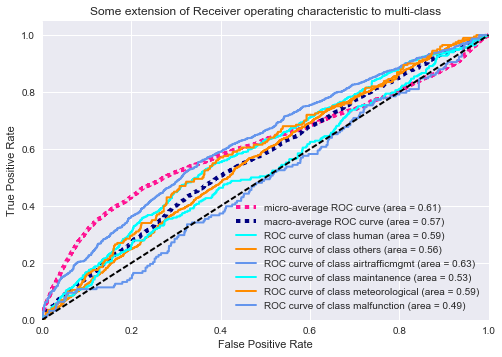

In [197]:
# Compute macro-average ROC curve and ROC area
lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

classes = ['human', 'others', 'airtrafficmgmt', 'maintanence', 'meteorological', 'malfunction']

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Why a One-Vs-All strategy?

- Also known as one-vs-all, this strategy consists in fitting one classifier per class. For each classifier, the class is fitted against all the other classes. In addition to its computational efficiency (only n_classes classifiers are needed), one advantage of this approach is its interpretability. Since each class is represented by one and one classifier only, it is possible to gain knowledge about the class by inspecting its corresponding classifier. This is the most commonly used strategy for multiclass classification and is a fair default choice.

In [ ]:
# Let me try a decision tree classifier

In [346]:
# Use graphviz to make a chart of the regression tree decision points:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn.tree import DecisionTreeClassifier

In [358]:
dtcN = DecisionTreeClassifier(max_depth=4)

In [359]:
dtcN.fit(X_dummies, y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [360]:
dtcN_scores = cross_val_score(dtcN, X_dummies, y, cv=4)
print (dtcN_scores, np.mean(dtcN_scores))

[ 0.28317711  0.29249012  0.32608696  0.39199209] 0.32343656877


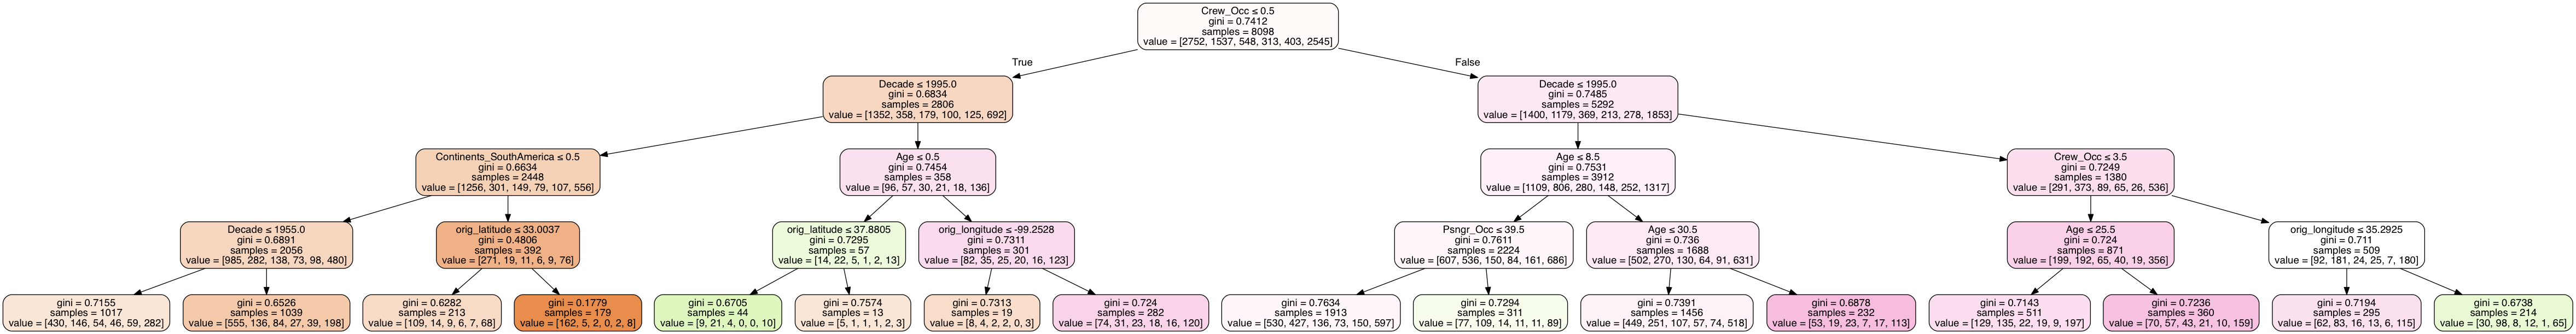

In [361]:
dot_data = StringIO()  

export_graphviz(dtcN, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X_dummies.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [366]:
dtc_params = {
    'max_depth':[None,4],
    'max_features':[None,2,3,4,5],
    'min_samples_split':[20,25,30,40,50]
}

from sklearn.model_selection import GridSearchCV

dtc_gs = GridSearchCV(DecisionTreeClassifier(), dtc_params, cv=5, verbose=1)

In [367]:
dtc_gs.fit(X_dummies, y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    3.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [None, 4], 'max_features': [None, 2, 3, 4, 5], 'min_samples_split': [20, 25, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [368]:
dtc_best = dtc_gs.best_estimator_
print (dtc_gs.best_params_)
print (dtc_gs.best_score_)

{'max_depth': 4, 'max_features': 2, 'min_samples_split': 40}
0.371202766115


In [370]:
fi = pd.DataFrame({
        'feature':X_dummies.columns,
        'importance':dtc_best.feature_importances_
    })

fi.sort_values('importance', ascending=False, inplace=True)
fi

,feature,importance
1,Psngr_Occ,0.266817
2,Age,0.239894
0,Crew_Occ,0.238121
3,Decade,0.185569
10,Continents_NorthAmerica,0.027943
14,Seasons_Winter,0.015624
12,Seasons_Spring,0.012008
8,Continents_Australia,0.007461
6,Continents_Antarctica,0.006562
4,orig_latitude,0.000000


In [371]:
# This doesnt seem like a good model!!!